<a href="https://colab.research.google.com/github/farnazmnz/Time-Series-Forecasting/blob/main/3_demand_garanti_fact_stock_kharid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel("data_demand_garanti_fact_stock_kharid.xlsx")

In [ ]:
data

,Unnamed: 0,Date_x,GDS_x,PLN_GROUP_x,QUALITY_F_x,DES_EN_x,YYMM_x,Date & GDS & PLN,Demand,QTY_GARANTY_S,INVENTORY_QTY,KHARID
0,0,28,16201007,BP,GS,SBS,140206,GS-16201007-140206-BP,58964,134,38297,41000
1,1,28,16201007,BP,GS,SBS,140205,GS-16201007-140205-BP,57489,493,44956,47200
2,2,28,16201007,BP,GS,SBS,140204,GS-16201007-140204-BP,58544,475,19138,68000
3,3,28,16201007,BP,GS,SBS,140203,GS-16201007-140203-BP,74039,461,29285,46750
4,4,28,16201007,BP,GS,SBS,140202,GS-16201007-140202-BP,51043,474,1764,37300
...,...,...,...,...,...,...,...,...,...,...,...,...
157,157,102,2705004,BP,OEM,SBS,140006,OEM-2705004-140006-BP,8446,569,17917,1200
158,158,102,2705004,BP,OEM,SBS,140008,OEM-2705004-140008-BP,7217,538,3180,3000
159,159,102,2705004,BP,OEM,SBS,140009,OEM-2705004-140009-BP,8198,556,1279,2100
160,160,102,2705004,BP,OEM,SBS,140010,OEM-2705004-140010-BP,8505,597,587,2330


In [ ]:
data['Date_x'].value_counts()

Date_x
35     25
68     20
28     19
50     19
56     18
49     16
102    16
85     13
57     12
41      4
Name: count, dtype: int64

In [ ]:
dfs = {}

for i in range(0, 103):
    dfs[i] = data[data['Date_x'] == i]

In [ ]:
dfs[35] = dfs[35].sort_values(by='YYMM_x', ascending=True)

In [ ]:
df = dfs[35]

In [ ]:
df = df.drop(columns=['Unnamed: 0' ,'Date_x' ,'GDS_x' ,'PLN_GROUP_x' ,'QUALITY_F_x' ,'DES_EN_x' ,'YYMM_x', 'Date & GDS & PLN'])

In [ ]:
df

,Demand,QTY_GARANTY_S,INVENTORY_QTY,KHARID
33,3026,142,9027,6912
34,3626,198,4873,7560
35,4152,175,9090,5388
36,5228,213,10452,5832
43,4839,202,11124,2591
38,7610,164,9131,2376
39,5584,129,3694,10584
40,5592,106,8940,7776
41,5029,115,11582,1
42,6884,156,6656,9258


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

### LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.layers import BatchNormalization, Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [ ]:
df_lstm = df.copy()

In [ ]:
scaler = MinMaxScaler()
#scaled_features = scaler.fit_transform(df_lstm[['QTY_GARANTY_S', 'INVENTORY_QTY', 'Demand']])
scaled_features = scaler.fit_transform(df_lstm.drop(columns=['Demand']))

window_size = 5

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size, :-1])
        y.append(data[i+window_size, -1])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_features, window_size)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lstm = Sequential()
model_lstm.add(LSTM(units=128, return_sequences=True, input_shape=(window_size, X_train.shape[2])))
model_lstm.add(BatchNormalization())
model_lstm.add(LSTM(units=64, return_sequences=True))
model_lstm.add(BatchNormalization())
model_lstm.add(LSTM(units=32))
model_lstm.add(Dense(units=1, kernel_regularizer=l2(0.001)))
model_lstm.add(Activation('linear'))

model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate the model
mse = model_lstm.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on test set: {mse}')




C:\Users\IDS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.2572
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1501
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0929
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.1111
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0564
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0394
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0490
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0521
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0456
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0376
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0332
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0323
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0321
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0308
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0280
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
predictions = model_lstm.predict(X_test)

predicted_values = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], predictions), axis=1))

predictions = predicted_values[:, -1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step


In [ ]:
def predict_next_12(model, initial_input, steps=12):
    current_input = initial_input.copy()
    predictions = []
    for _ in range(steps):
        next_pred = model.predict(current_input.reshape(1, window_size, 2))
        predictions.append(next_pred[0][0])
        current_input = np.roll(current_input, -1, axis=0)
        current_input[-1, -1] = next_pred[0][0]
    return predictions

initial_input = scaled_features[-window_size:, :-1]

predictions_next_12 = predict_next_12(model_lstm, initial_input)

expanded_initial_input = np.repeat(initial_input[-1:], repeats=12, axis=0)

combined_array = np.hstack((expanded_initial_input, np.array(predictions_next_12).reshape(-1, 1)))

predicted_values_next_12 = scaler.inverse_transform(combined_array)

predicted_demand_next_12 = predicted_values_next_12[:, -1]

print("Predicted values for the next 12 steps:")
print(predicted_demand_next_12)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted values for the next 12 steps:
[288.54350175 290.24642945 312.12868883 323.54231857 402.42327514
 340.72471084 363.27532143 392.74338419 403.26023752 448.4277821
 340.12620896 362.7049184 ]


In [ ]:
df_to_append = pd.DataFrame(columns=df_lstm.columns)
df_to_append['Demand'] = predicted_demand_next_12
for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0
df_lstm = pd.concat([df_lstm, df_to_append], ignore_index=True)

In [ ]:
df_lstm

,Demand,QTY_GARANTY_S,INVENTORY_QTY,KHARID
0,3026.000000,142,9027,6912
1,3626.000000,198,4873,7560
2,4152.000000,175,9090,5388
3,5228.000000,213,10452,5832
4,4839.000000,202,11124,2591
5,7610.000000,164,9131,2376
6,5584.000000,129,3694,10584
7,5592.000000,106,8940,7776
8,5029.000000,115,11582,1
9,6884.000000,156,6656,9258


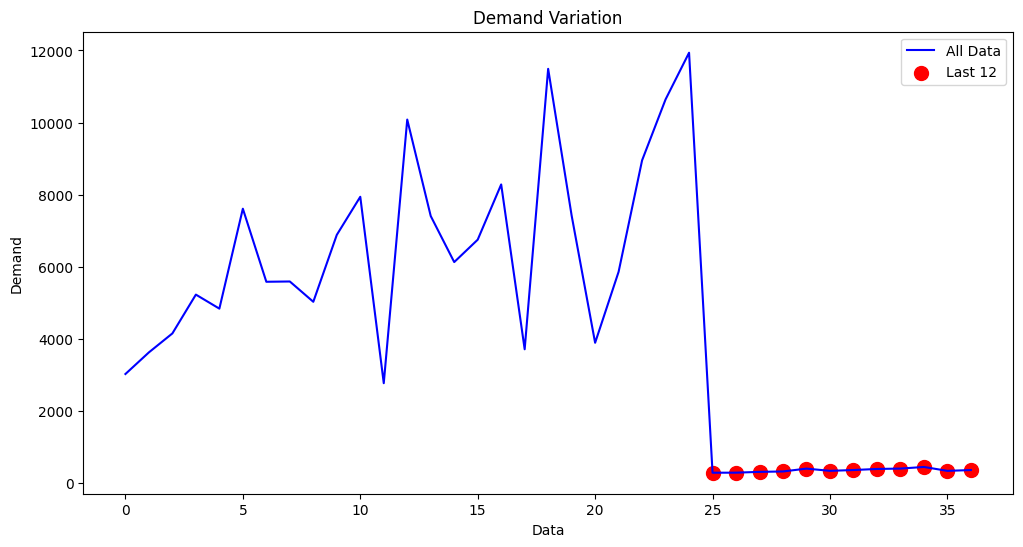

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_lstm.index, df_lstm['Demand'], label='All Data', color='blue')
plt.scatter(df_lstm.index[-12:], df_lstm['Demand'].tail(12), color='red', label='Last 12', s=100)
plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()
plt.show()

In [ ]:
df_lstm['Percentage Change'] = df_lstm['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_lstm['Percentage Change'] >= -tolerance) & (df_lstm['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

df_lr = df.copy()

features = df_lr.drop(columns=['Demand'])
target = df_lr['Demand']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

predictions = model_lr.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 5343547.723469058


In [ ]:
next_12_data = df_lr.iloc[-12:].drop(columns=['Demand'])
next_12_predictions = model_lr.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [ 7275.8692553   6873.76800161  7053.85998106  6362.10103084
  5249.9084326   5489.35171967  5260.63220868  5913.1007911
  5771.32713451  8485.51888023 10084.34560324  8803.96432954]


In [ ]:
df_to_append = pd.DataFrame(columns=df_lr.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_lr = pd.concat([df_lr, df_to_append], ignore_index=True)

In [ ]:
df_lr

,Demand,QTY_GARANTY_S,INVENTORY_QTY,KHARID
0,3026.000000,142,9027,6912
1,3626.000000,198,4873,7560
2,4152.000000,175,9090,5388
3,5228.000000,213,10452,5832
4,4839.000000,202,11124,2591
5,7610.000000,164,9131,2376
6,5584.000000,129,3694,10584
7,5592.000000,106,8940,7776
8,5029.000000,115,11582,1
9,6884.000000,156,6656,9258


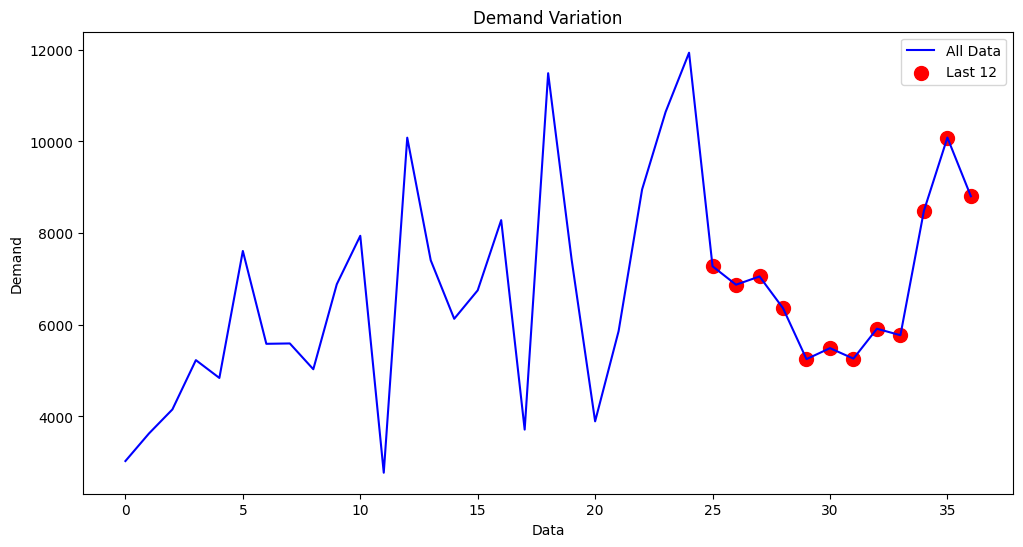

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_lr.index, df_lr['Demand'], label='All Data', color='blue')
plt.scatter(df_lr.index[-12:], df_lr['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_lr['Percentage Change'] = df_lr['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_lr['Percentage Change'] >= -tolerance) & (df_lr['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### SVR

In [ ]:
from sklearn.svm import SVR

df_svr = df.copy()

features = df_svr.drop(columns=['Demand'])
target = df_svr['Demand']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_svr = SVR(kernel='linear')

model_svr.fit(X_train, y_train)

predictions = model_svr.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 5013921.361167255


In [ ]:
next_12_data = df_svr.iloc[-12:].drop(columns=['Demand'])
next_12_predictions = model_svr.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [7418.57891155 6142.29986042 6698.77471651 5361.27112752 4796.32501651
 5555.49591354 4930.05074751 6158.6014809  5801.62683272 8976.86395991
 8416.14379341 4692.45367253]


In [ ]:
df_to_append = pd.DataFrame(columns=df_svr.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_svr = pd.concat([df_svr, df_to_append], ignore_index=True)

In [ ]:
df_svr

,Demand,QTY_GARANTY_S,INVENTORY_QTY,KHARID
0,3026.000000,142,9027,6912
1,3626.000000,198,4873,7560
2,4152.000000,175,9090,5388
3,5228.000000,213,10452,5832
4,4839.000000,202,11124,2591
5,7610.000000,164,9131,2376
6,5584.000000,129,3694,10584
7,5592.000000,106,8940,7776
8,5029.000000,115,11582,1
9,6884.000000,156,6656,9258


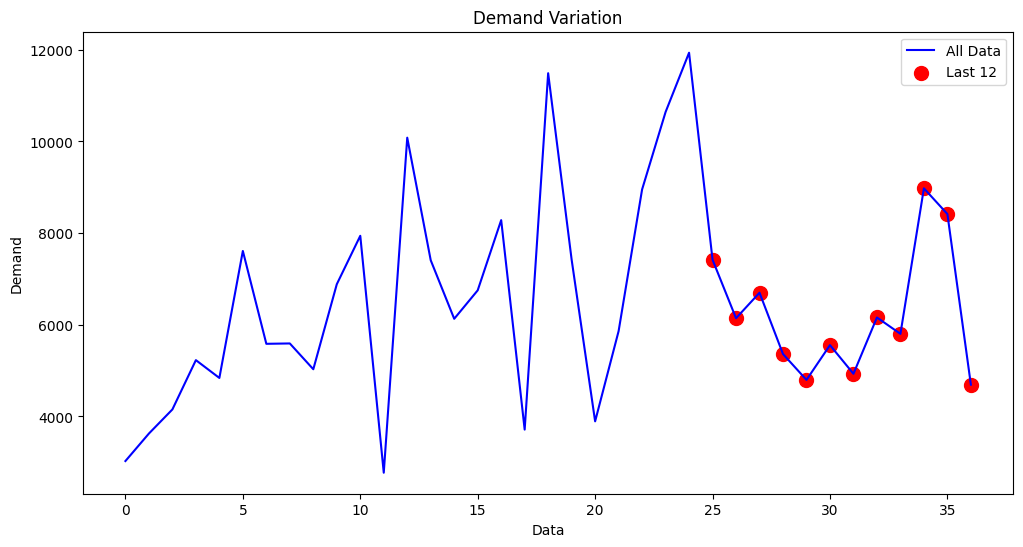

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_svr.index, df_svr['Demand'], label='All Data', color='blue')
plt.scatter(df_svr.index[-12:], df_svr['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_svr['Percentage Change'] = df_svr['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_svr['Percentage Change'] >= -tolerance) & (df_svr['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

df_dt = df.copy()

features = df_svr[['QTY_GARANTY_S', 'INVENTORY_QTY', 'KHARID']]
target = df_svr['Demand']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_dt = DecisionTreeRegressor()

model_dt.fit(X_train, y_train)

predictions = model_dt.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 5370925.285539021


In [ ]:
next_12_data = df_dt.iloc[-12:].drop(columns=['Demand'])
next_12_predictions = model_dt.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [10082.          6130.          6751.          8283.
  6021.89230639 11489.          7420.          3892.
  5861.          8952.         10642.         11936.        ]


In [ ]:
df_to_append = pd.DataFrame(columns=df_dt.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_dt = pd.concat([df_dt, df_to_append], ignore_index=True)

In [ ]:
df_dt

,Demand,QTY_GARANTY_S,INVENTORY_QTY,KHARID
0,3026.000000,142,9027,6912
1,3626.000000,198,4873,7560
2,4152.000000,175,9090,5388
3,5228.000000,213,10452,5832
4,4839.000000,202,11124,2591
5,7610.000000,164,9131,2376
6,5584.000000,129,3694,10584
7,5592.000000,106,8940,7776
8,5029.000000,115,11582,1
9,6884.000000,156,6656,9258


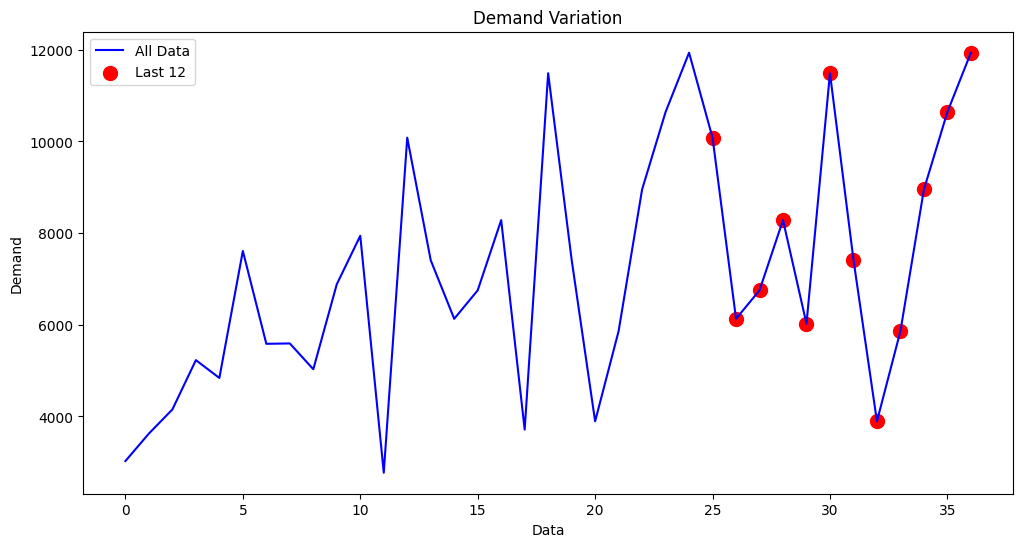

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_dt.index, df_dt['Demand'], label='All Data', color='blue')
plt.scatter(df_dt.index[-12:], df_dt['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_dt['Percentage Change'] = df_dt['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_dt['Percentage Change'] >= -tolerance) & (df_dt['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

df_rf = df.copy()

features = df_rf.drop(columns=['Demand'])
target = df_rf['Demand']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor()

model_rf.fit(X_train, y_train)

predictions = model_rf.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 11810736.41936


In [ ]:
next_12_data = df_rf.iloc[-12:].drop(columns=['Demand'])
next_12_predictions = model_rf.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [ 6799.48  5804.84  6292.32  5622.77  4702.94 10428.94  8234.75  4812.2
  5662.61  8767.29  9513.97  9629.92]


In [ ]:
df_to_append = pd.DataFrame(columns=df_rf.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_rf = pd.concat([df_rf, df_to_append], ignore_index=True)

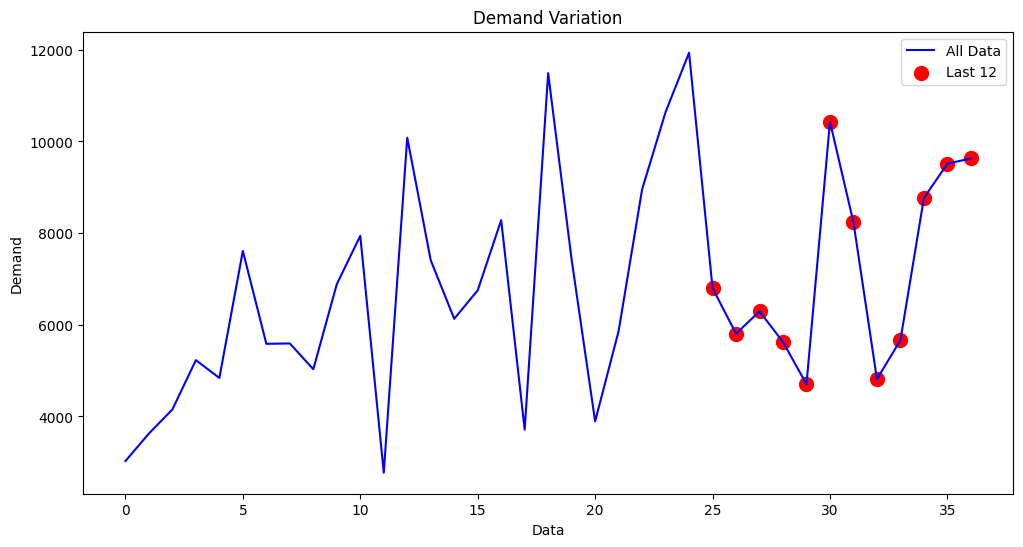

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_rf.index, df_rf['Demand'], label='All Data', color='blue')
plt.scatter(df_rf.index[-12:], df_rf['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_rf['Percentage Change'] = df_rf['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_rf['Percentage Change'] >= -tolerance) & (df_rf['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.
